<a href="https://colab.research.google.com/github/ghdakrk/computr_vision/blob/main/3_image_trans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# 변환행렬
import cv2
import skimage.data

img_astro = skimage.data.astronaut()
img = cv2.cvtColor(img_astro, cv2.COLOR_BGR2GRAY)
rows, cols = img.shape[:2]

# 30도 회전, 70% 다운사이즈
H = cv2.getRotationMatrix2D((cols/2, rows/2), 30, 0.7)

# 50만큼 평행이동
H[:, 2] += 50

In [6]:
import matplotlib.pyplot as plt

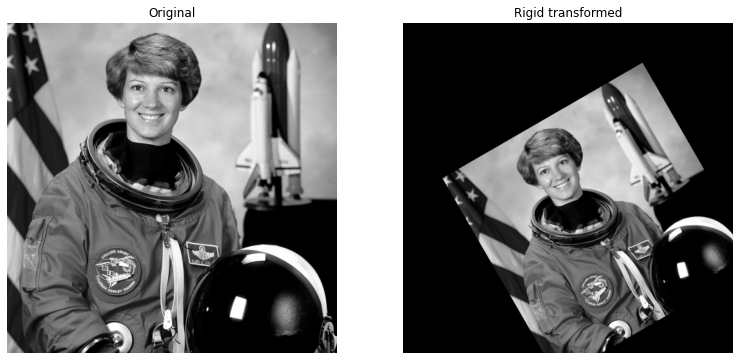

In [7]:
# 적용
dst = cv2.warpAffine(img, H, (cols, rows))

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(13, 13))
ax1.set_title("Original")
ax1.axis("off")
ax1.imshow(img, cmap=plt.cm.gray)
ax2.set_title("Rigid transformed")
ax2.axis("off")
ax2.imshow(dst, cmap=plt.cm.gray)
plt.show()

In [11]:
import scipy as sp
import scipy.misc
import numpy as np

img = scipy.misc.face()
rows, cols, ch = img.shape
pts1 = np.float32([[200, 200], [200, 600], [800, 200]])
pts2 = np.float32([[100, 100], [200, 500], [600, 100]])
pts_x1, pts_y1 = zip(*pts1)
pts_x2, pts_y2 = zip(*pts2)
H_affine = cv2.getAffineTransform(pts1, pts2)
H_affine


array([[ 8.33333333e-01,  2.50000000e-01, -1.16666667e+02],
       [-1.77635684e-17,  1.00000000e+00, -1.00000000e+02]])

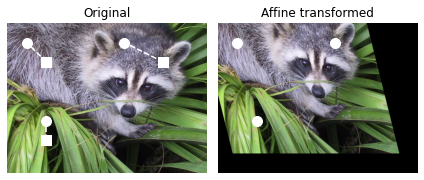

In [12]:
img2 = cv2.warpAffine(img, H_affine, (cols, rows))
fig, [ax1, ax2] = plt.subplots(1, 2)
ax1.set_title("Original")
ax1.imshow(img)
ax1.scatter(pts_x1, pts_y1, c='w', s=100, marker="s")
ax1.scatter(pts_x2, pts_y2, c='w', s=100)
ax1.plot(list(zip(*np.stack((pts_x1, pts_x2), axis=-1))),
 list(zip(*np.stack((pts_y1, pts_y2), axis=-1))), "--", c="w")
ax1.axis("off")
ax2.set_title("Affine transformed")
ax2.imshow(img2)
ax2.scatter(pts_x2, pts_y2, c='w', s=100)
ax2.axis("off")
plt.tight_layout()
plt.show()

In [13]:
pts1 = np.float32([[200, 200], [200, 600], [800, 200], [800, 600]])
pts2 = np.float32([[300, 300], [300, 500], [600, 100], [700, 500]])
H_perspective = cv2.getPerspectiveTransform(pts1, pts2)
H_perspective


array([[-8.43769499e-17, -7.62711864e-02,  2.59322034e+02],
       [-3.38983051e-01,  2.79661017e-01,  2.55932203e+02],
       [-6.77966102e-04, -2.54237288e-04,  1.00000000e+00]])

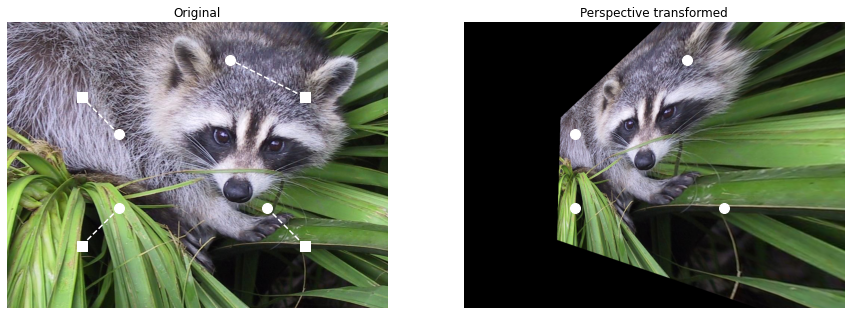

In [14]:
img2 = cv2.warpPerspective(img, H_perspective, (cols, rows))
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(15, 15))
pts_x, pts_y = zip(*pts1)
pts_x_, pts_y_ = zip(*pts2)
ax1.set_title("Original")
ax1.imshow(img, cmap=plt.cm.bone)
ax1.scatter(pts_x, pts_y, c='w', s=100, marker="s")
ax1.scatter(pts_x_, pts_y_, c='w', s=100)
ax1.plot(list(zip(*np.stack((pts_x, pts_x_), axis=-1))),
 list(zip(*np.stack((pts_y, pts_y_), axis=-1))), "--", c="w")
ax1.axis("off")
ax2.set_title("Perspective transformed")
ax2.imshow(img2, cmap=plt.cm.bone)
ax2.scatter(pts_x_, pts_y_, c='w', s=100)
ax2.axis("off")
plt.show()

In [16]:
img_raw = cv2.imread("./receipt.png")
img_raw = cv2.cvtColor(img_raw, cv2.COLOR_RGB2GRAY)
closing = cv2.morphologyEx(img_raw, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (50,50)))
_, thresh1 = cv2.threshold(closing, 200, 255, cv2.THRESH_BINARY)

contours, hierachy = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

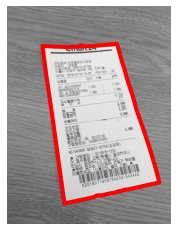

In [18]:
c0 = contours[0]
M = cv2.moments(c0)

x0, y0 = zip(*np.squeeze(c0))
plt.imshow(img_raw, cmap=plt.cm.gray)
plt.plot(x0, y0, c="r", lw=4)
plt.axis("off")
plt.show()

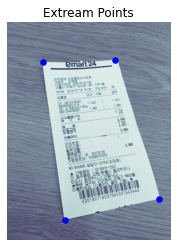

In [20]:
leftmost = tuple(c0[c0[:, :, 0].argmin()][0])
rightmost = tuple(c0[c0[:, :, 0].argmax()][0])
topmost = tuple(c0[c0[:, :, 1].argmin()][0])
bottommost = tuple(c0[c0[:, :, 1].argmax()][0])


plt.imshow(img_raw, cmap='bone')
plt.axis("off")
plt.scatter(
 [leftmost[0], rightmost[0], topmost[0], bottommost[0]], 
 [leftmost[1], rightmost[1], topmost[1], bottommost[1]], 
 c="b", s=30)
plt.title("Extream Points")
plt.show()

In [21]:
M

{'m00': 676274.0,
 'm01': 572662874.1666666,
 'm02': 549235614392.1666,
 'm03': 572344042312987.4,
 'm10': 435326520.6666666,
 'm11': 379615699263.5833,
 'm12': 370770995494968.25,
 'm20': 305117012805.3333,
 'm21': 273107228657819.28,
 'm30': 229191531509499.8,
 'mu02': 64309730136.92767,
 'mu03': -1657671972501.25,
 'mu11': 10985031034.510315,
 'mu12': -1383290977121.914,
 'mu20': 24891572235.762756,
 'mu21': 594406651373.3047,
 'mu30': 737605066389.875,
 'nu02': 0.14061488803805983,
 'nu03': -0.00440749539680215,
 'nu11': 0.02401905443738307,
 'nu12': -0.0036779584352284673,
 'nu20': 0.05442606640660167,
 'nu21': 0.0015804360713195596,
 'nu30': 0.001961178682333586}

In [40]:
img_raw.shape

(1578, 1184)

In [65]:
pts1 = np.float32([leftmost, bottommost, topmost, rightmost])
pts2 = np.float32([[0,0], [0,1578], [1184,0], [1184,1578]])
H_perspective = cv2.getPerspectiveTransform(pts1, pts2)
H_perspective

array([[ 2.18487324e+00, -3.05576677e-01, -4.71627044e+02],
       [ 5.41700254e-02,  2.03524524e+00, -5.97982911e+02],
       [-1.67229245e-04,  3.84729701e-04,  1.00000000e+00]])

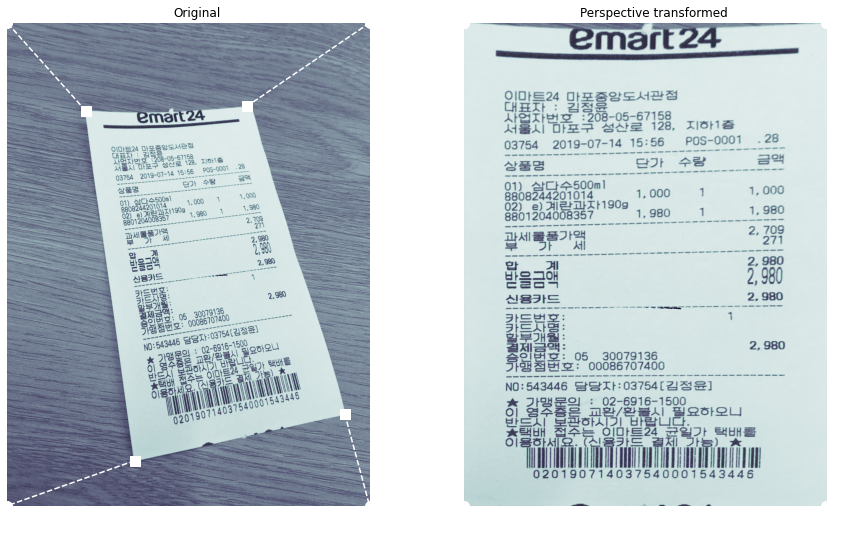

In [70]:
rows, cols = img_raw.shape
img2 = cv2.warpPerspective(img_raw, H_perspective, (cols, rows))
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(15, 15))
pts_x, pts_y = zip(*pts1)
pts_x_, pts_y_ = zip(*pts2)
ax1.set_title("Original")
ax1.imshow(img_raw, cmap=plt.cm.bone)
ax1.scatter(pts_x, pts_y, c='w', s=100, marker="s")
ax1.scatter(pts_x_, pts_y_, c='w', s=100)
ax1.plot(list(zip(*np.stack((pts_x, pts_x_), axis=-1))),
 list(zip(*np.stack((pts_y, pts_y_), axis=-1))), "--", c="w")
ax1.axis("off")
ax2.set_title("Perspective transformed")
ax2.imshow(img2, cmap=plt.cm.bone)
ax2.scatter(pts_x_, pts_y_, c='w', s=100)
ax2.axis("off")
plt.show()